# Objective : Diabetes Dataset Regression
# EDA - Python
# Insights - Patterns
#  Regression

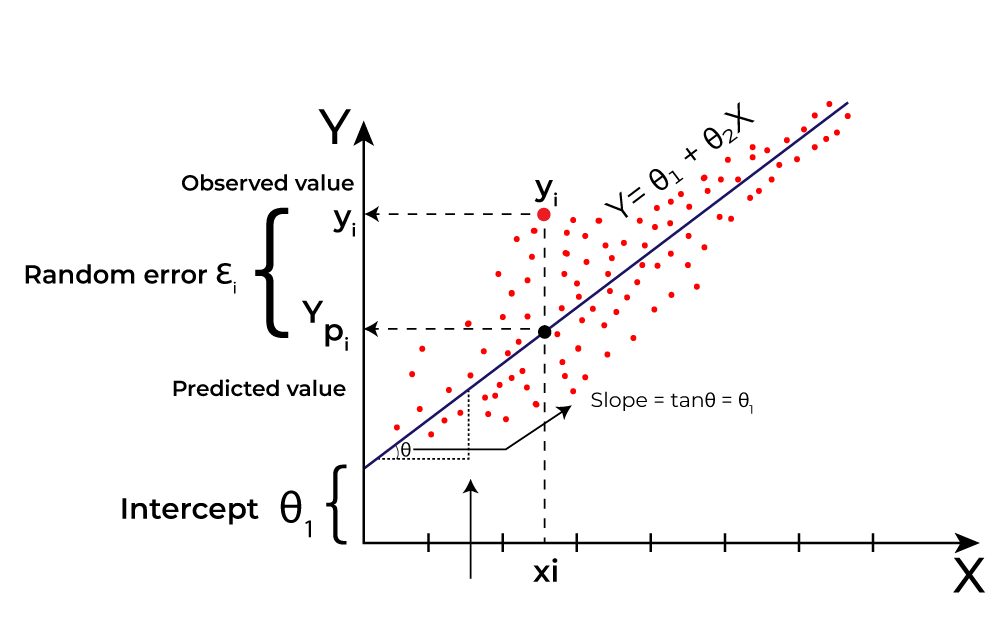

# 1. Import Python Modules

In [72]:
# Load necessary python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 2.  Load Dataset

- dataset taken - https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

In [73]:
file_path = r"diabetes_dataset.csv"
diabetes_df = pd.read_csv(file_path)
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


$observations$
- Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum 
- measurements were obtained for each of n = 442 diabetes patients, 
- as well as the response of interest, a quantitative measure of disease progression one year after baseline.

- age

- sex

- bmi body mass index

- bp average blood pressure

- s1 tc, total serum cholesterol

- s2 ldl, low-density lipoproteins

- s3 hdl, high-density lipoproteins

- s4 tch, total cholesterol / HDL

- s5 ltg, possibly log of serum triglycerides level

- s6 glu, blood sugar level

### Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples

# 3. Basic Inspection on dataset

In [74]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table summary ")
    print(table.describe())

basic_inspection_dataset(diabetes_df)

top 5 rows - using head
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

bottom 5 rows using tail
          age       sex       bmi        bp        s1        s2        s3  \
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0

In [75]:
diabetes_df["sex"].value_counts()

sex
-0.044642    235
 0.050680    207
Name: count, dtype: int64

In [76]:
diabetes_df['sex']=diabetes_df['sex'].apply(lambda x: 'Female' if x < 0.05 else 'Male')
diabetes_df['sex'].astype('category')

0        Male
1      Female
2        Male
3      Female
4      Female
        ...  
437      Male
438      Male
439      Male
440    Female
441    Female
Name: sex, Length: 442, dtype: category
Categories (2, object): ['Female', 'Male']

In [77]:
diabetes_df["target_log"]=np.log1p(diabetes_df["target"])
diabetes_df["target_sqrt"]=np.sqrt(diabetes_df["target"])

# 4. Handling Missing Values - Cat

In [78]:
# There is no missing values in cat columns

# 5. Categorical- Variable - Analysis -Using Pipeline

In [79]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%0.2f%%', startangle=40)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

sex frequency table
+---+--------+-----------+
|   | Class  | Frequency |
+---+--------+-----------+
| 0 | Female |    235    |
| 1 |  Male  |    207    |
+---+--------+-----------+
sex Relative frequency table
+---+--------+-----------+----------------------+
|   | Class  | Frequency | Relative Frequency % |
+---+--------+-----------+----------------------+
| 0 | Female |    235    |        53.17         |
| 1 |  Male  |    207    |        46.83         |
+---+--------+-----------+----------------------+


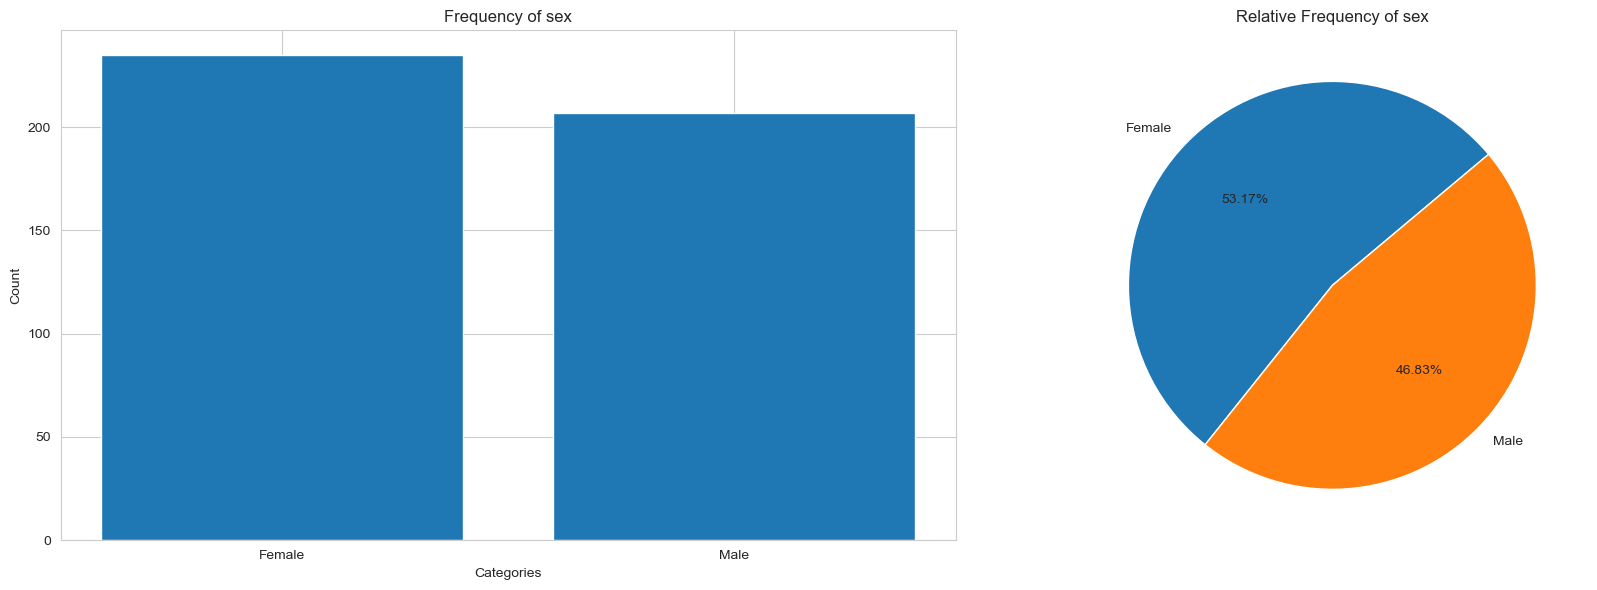

In [80]:
pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(diabetes_df)

# 6. Handling Missing Values in Numerical Columns

In [81]:
# There is no missing values in num columns

# 7. Numerical - Variables - Analysis - Using -Pipeline

In [82]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
               
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()
        


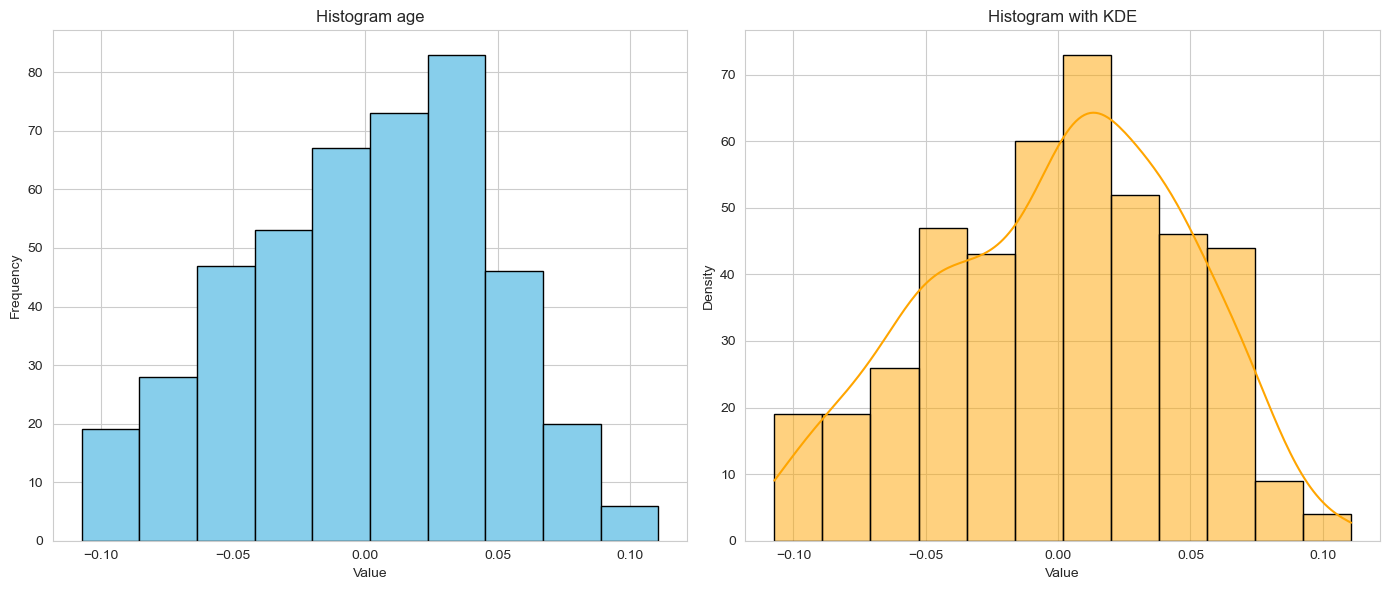

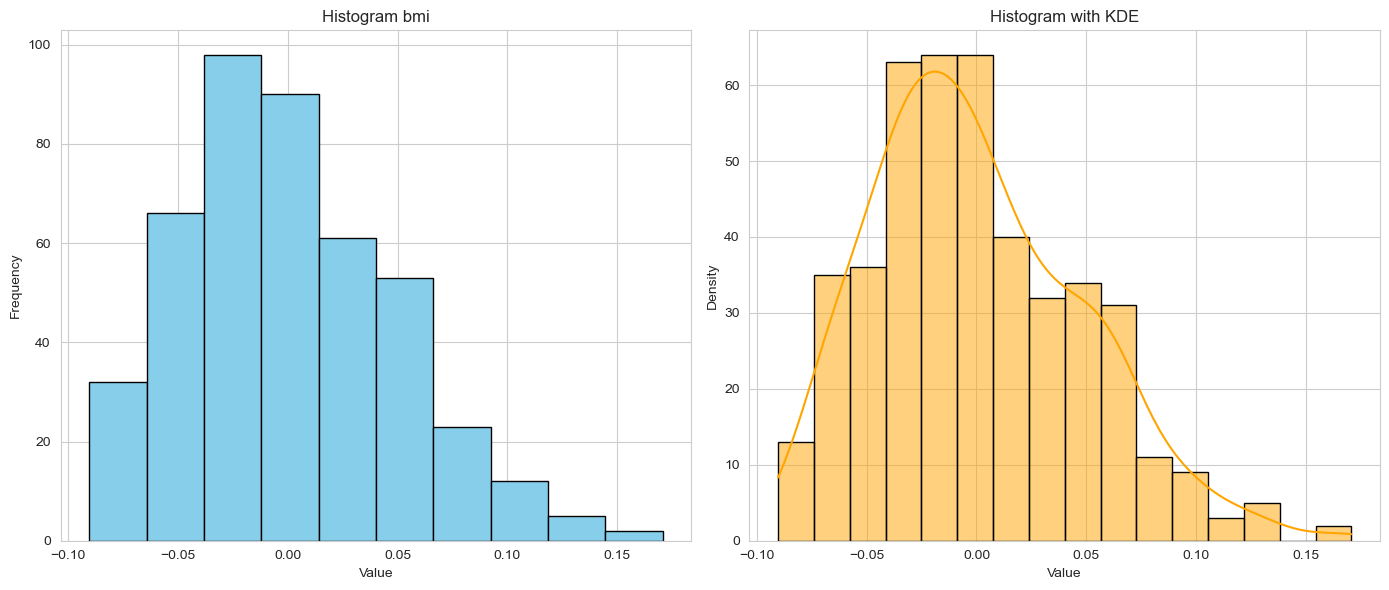

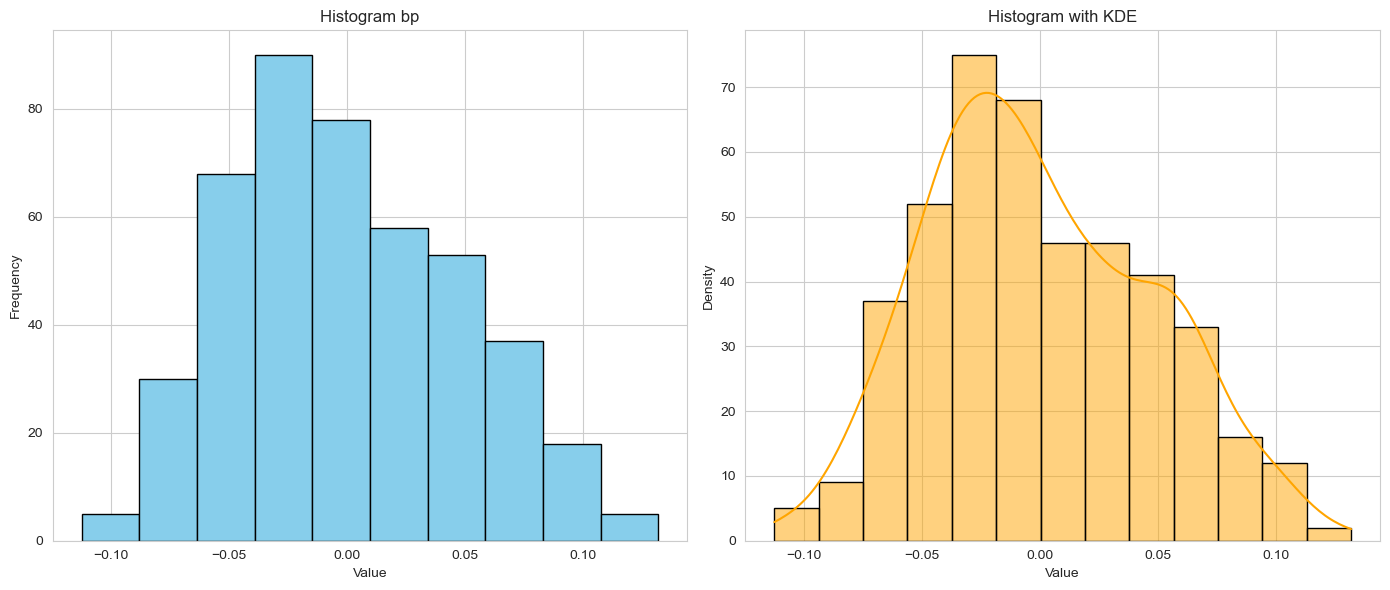

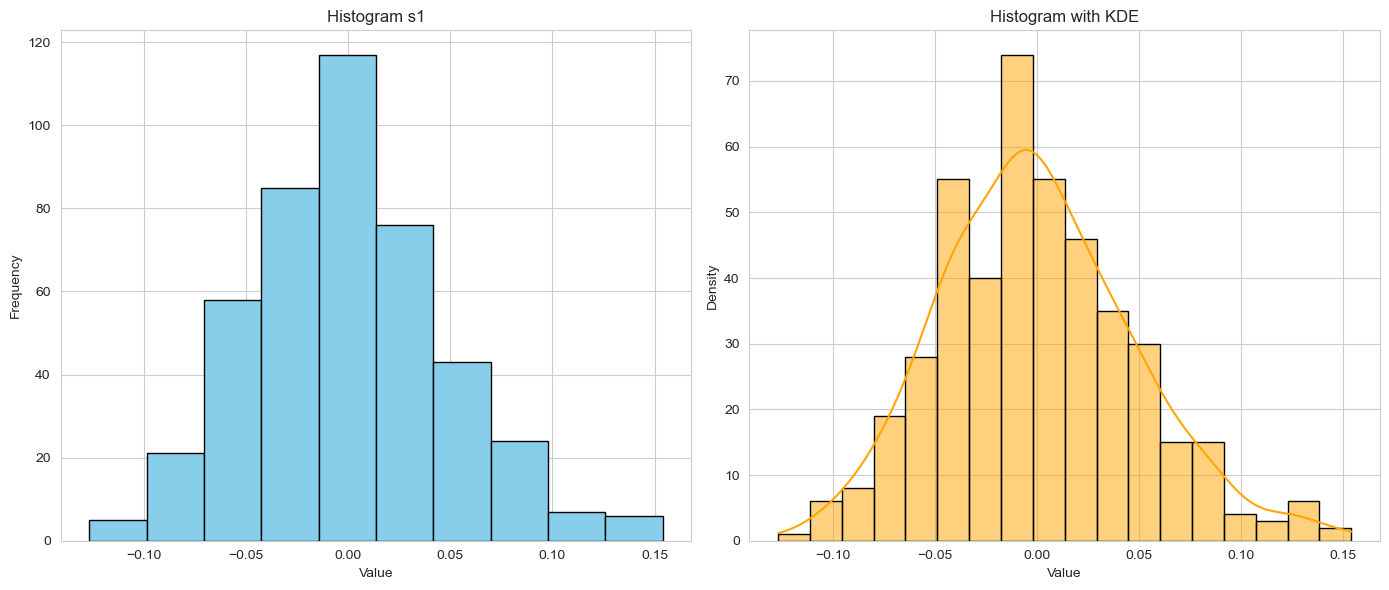

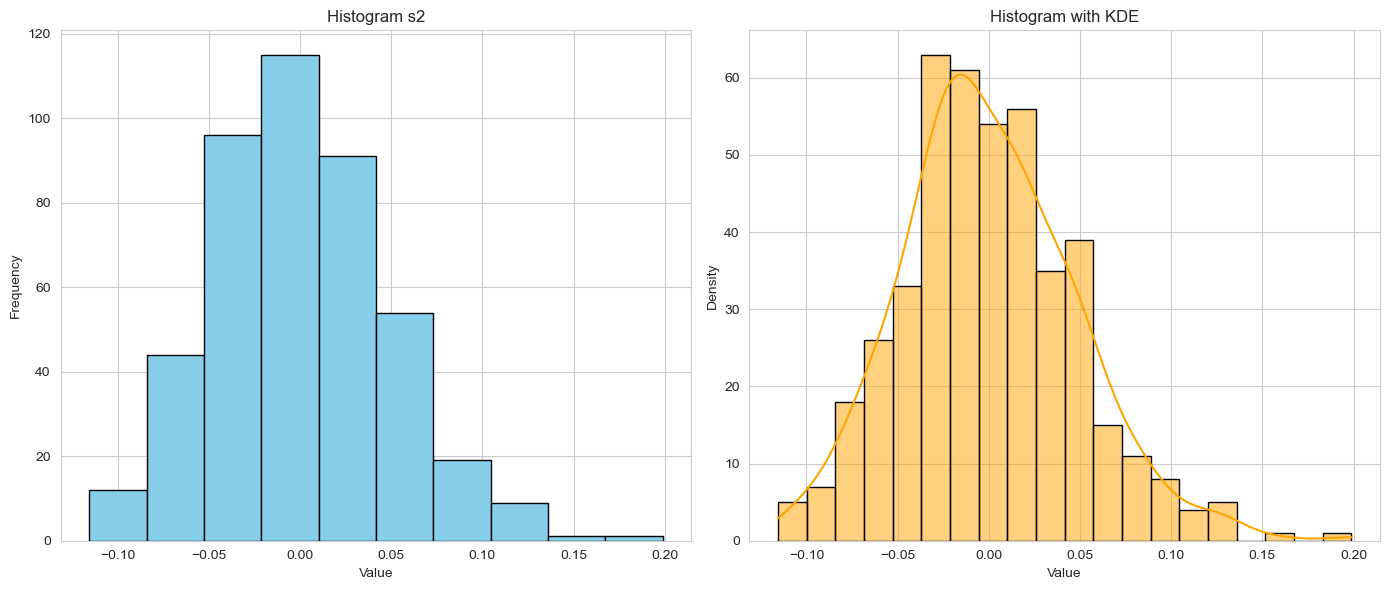

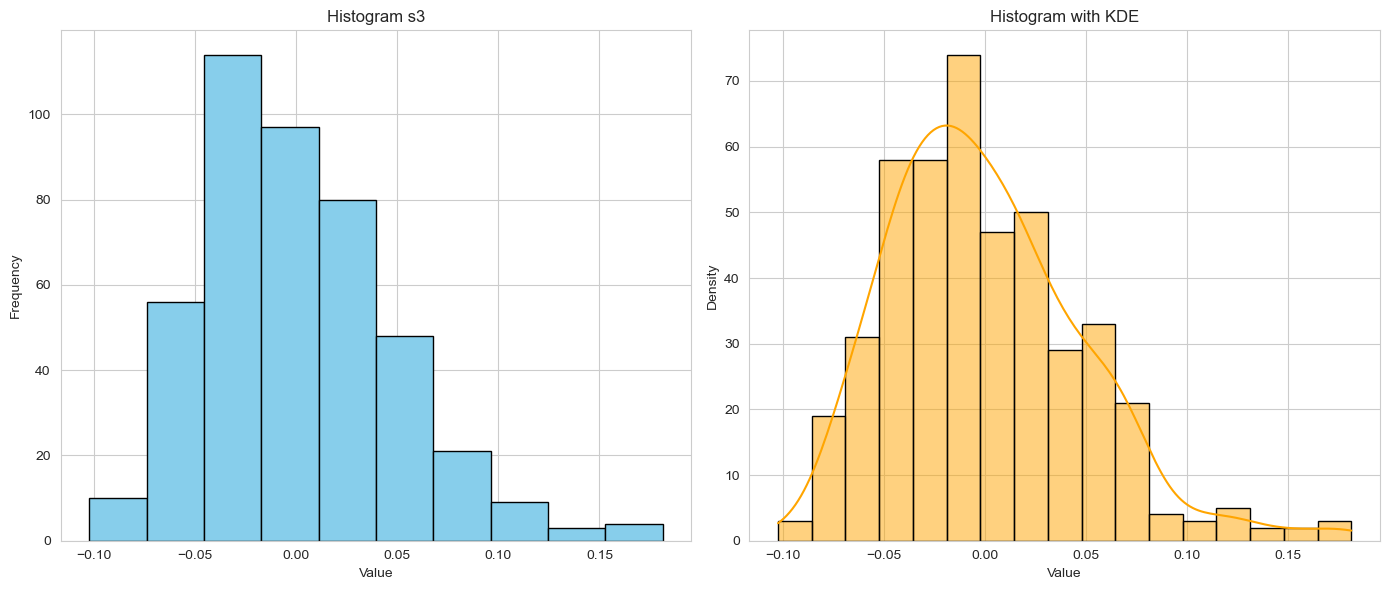

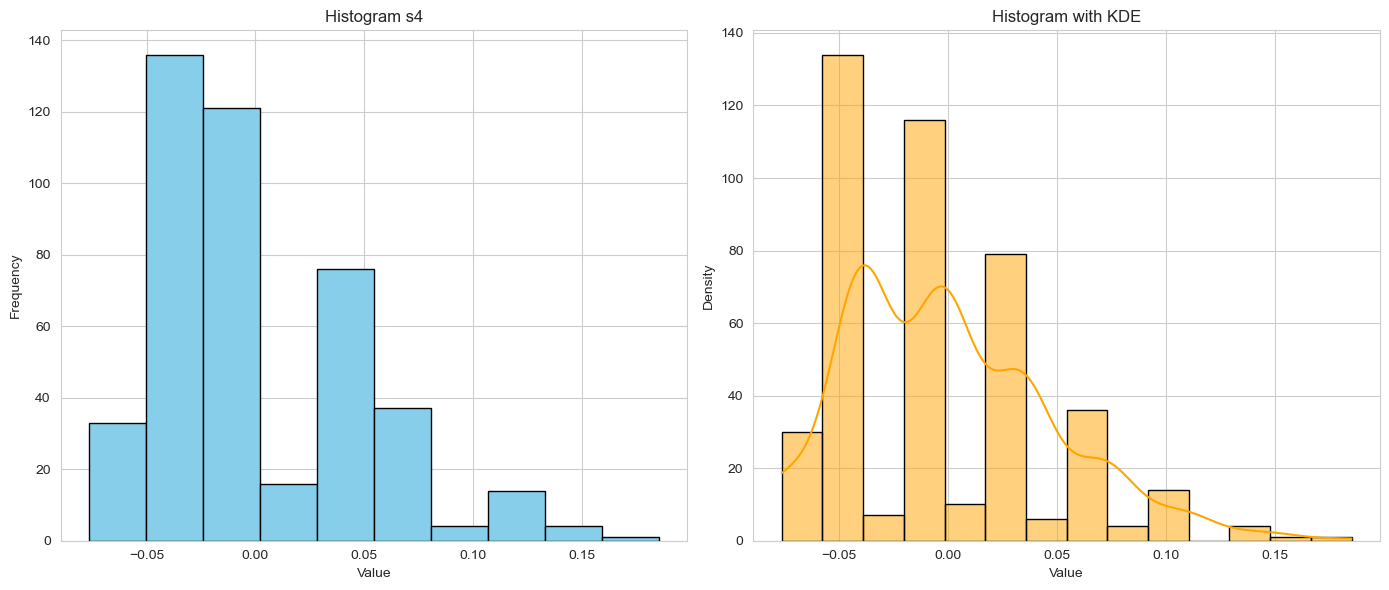

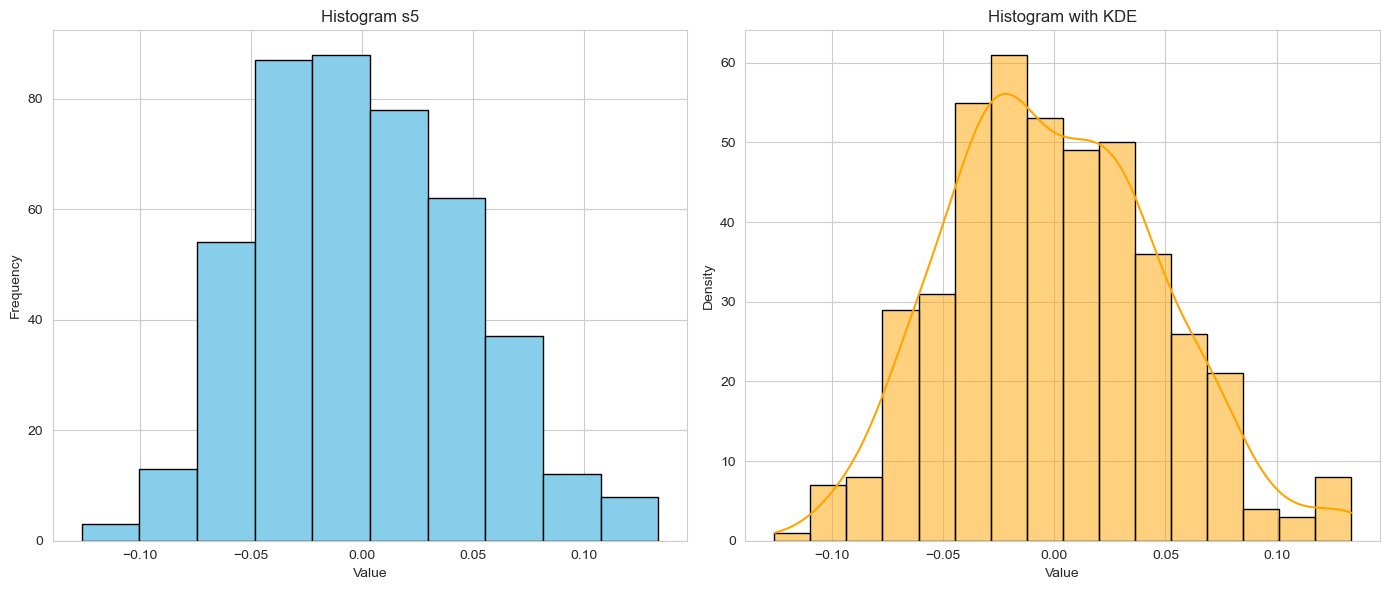

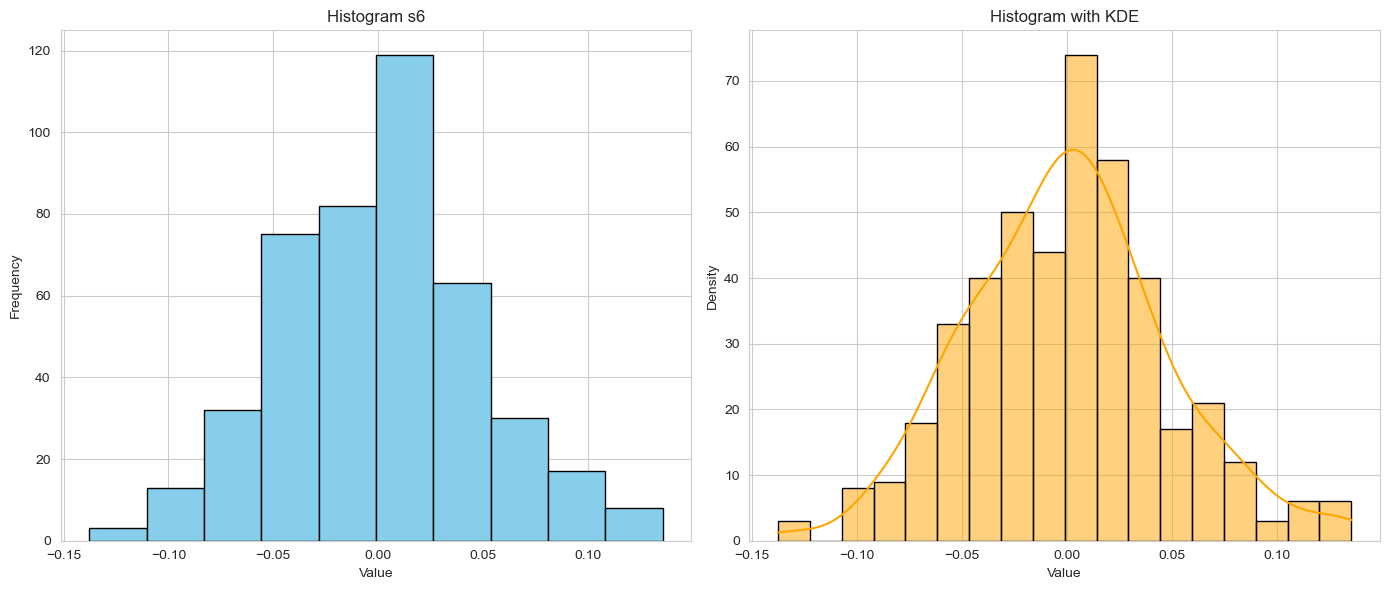

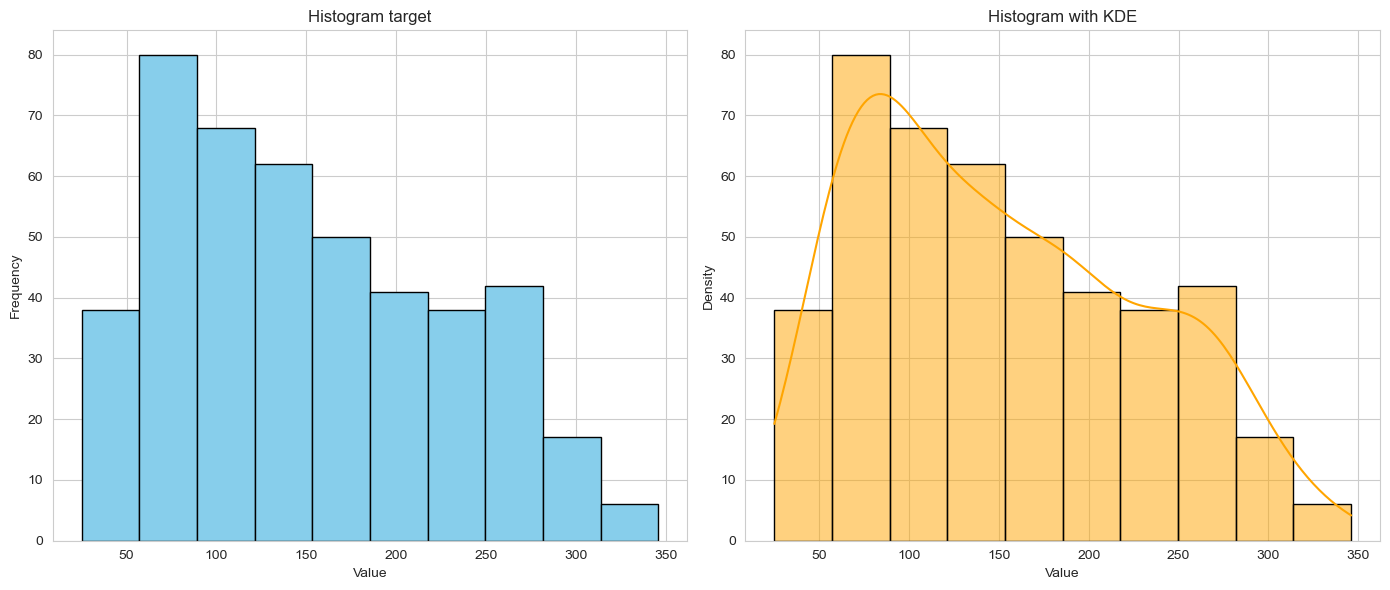

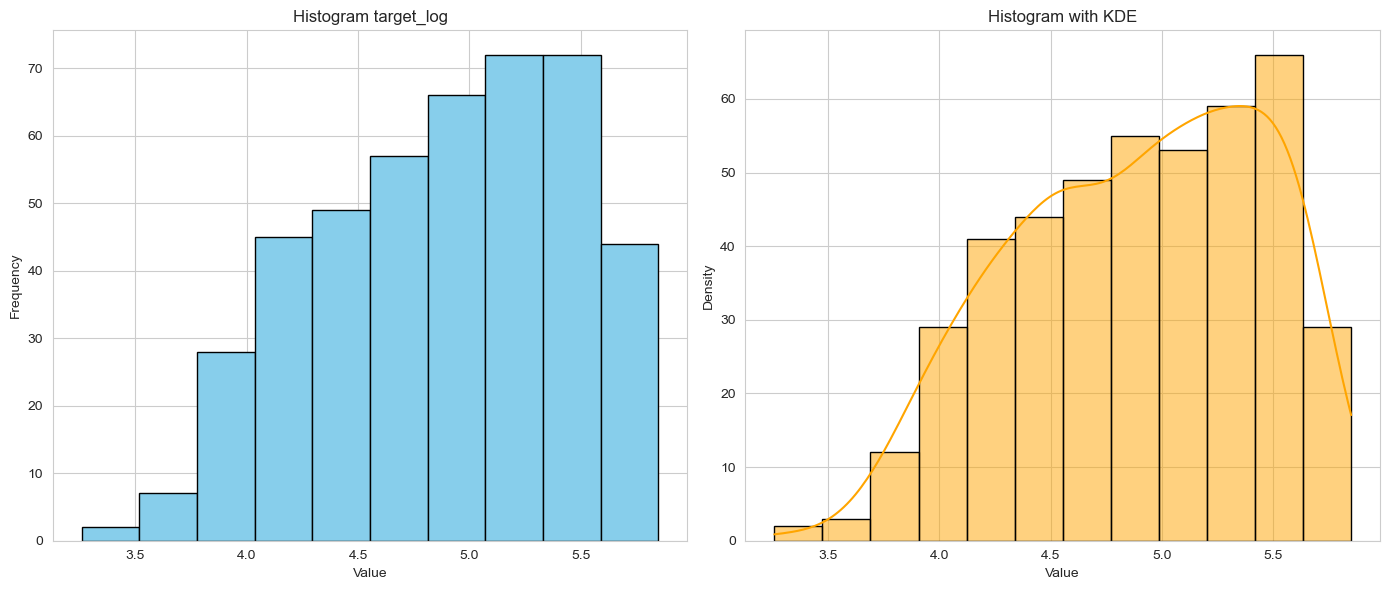

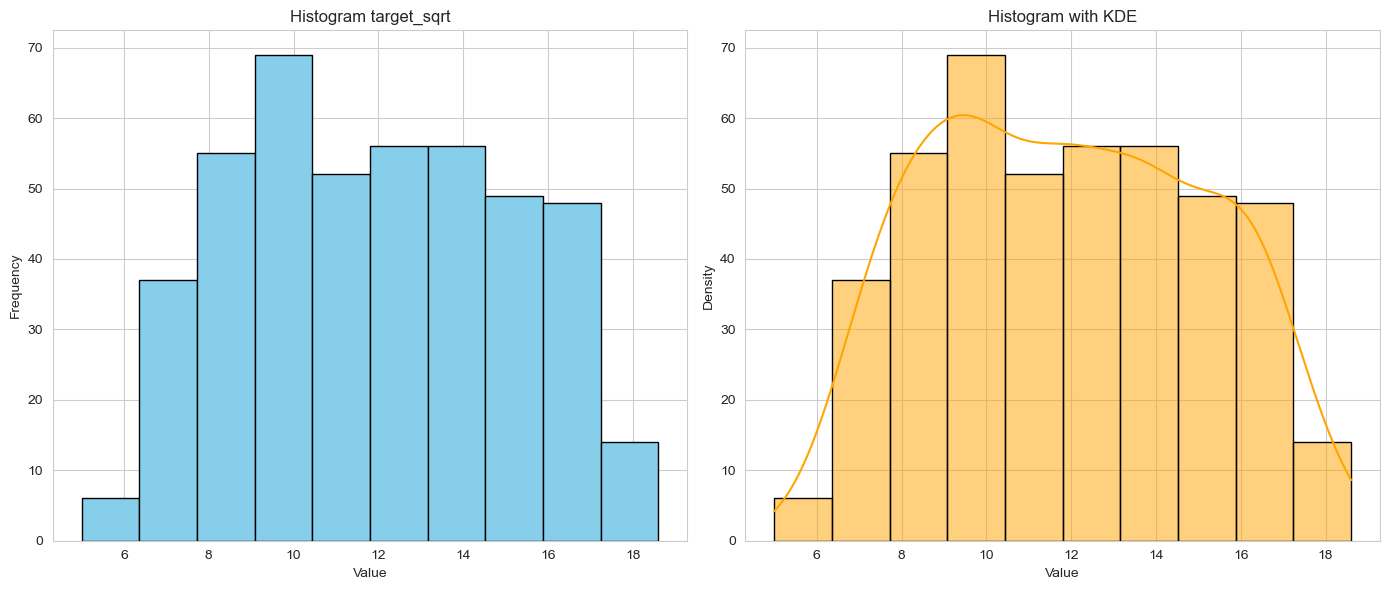

In [83]:
pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(diabetes_df)

 # 8. Numerical - Variables -Outliers Analysis

# 9. Bi Variate Analysis

## Cat Vs Num

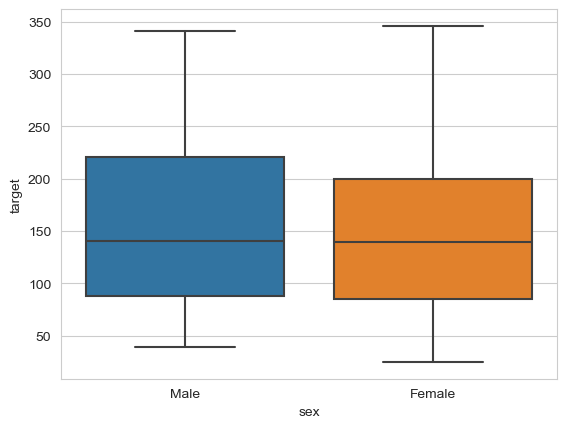

In [84]:
# Create a box plot with hue
sns.boxplot(x='sex' ,y='target', data=diabetes_df)
# Show the plot
plt.show()

## Num Vs Num

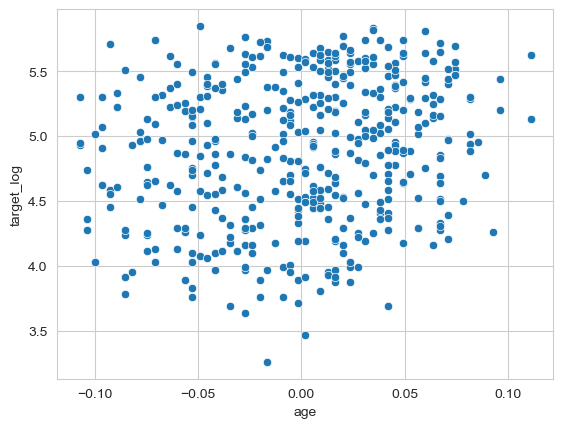

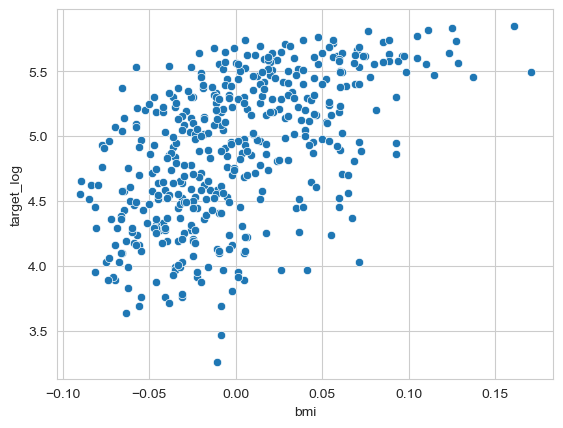

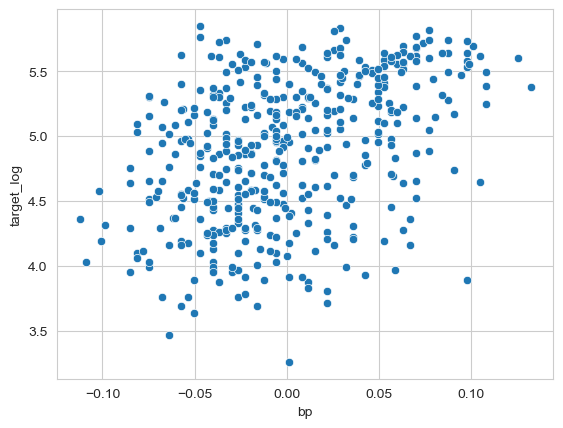

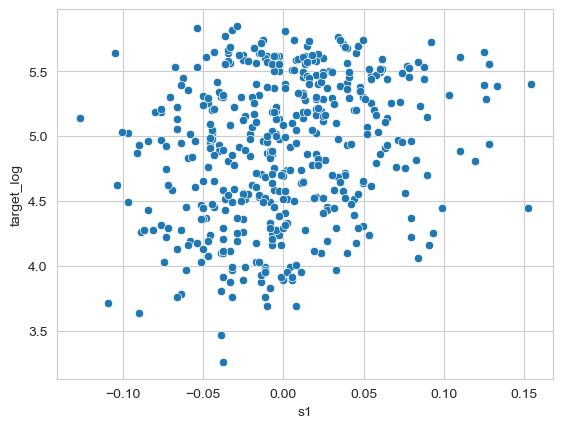

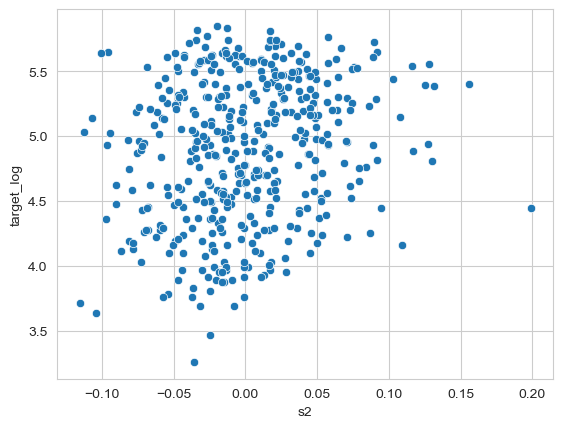

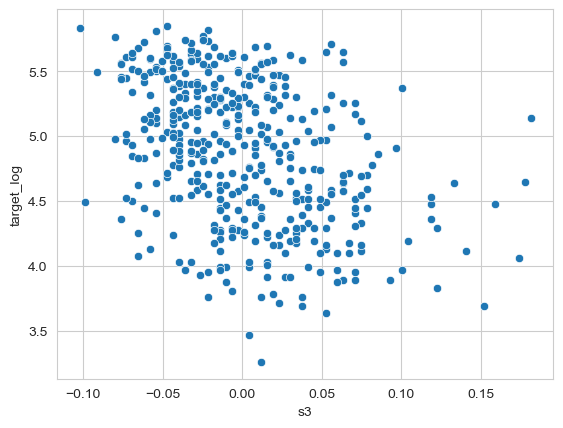

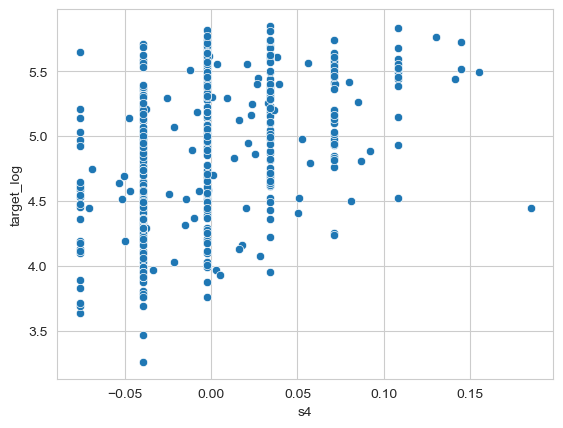

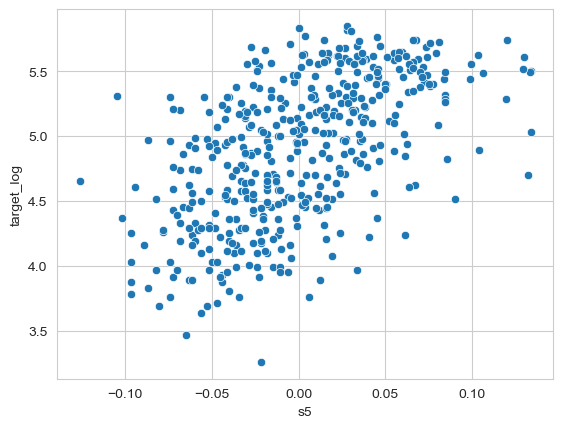

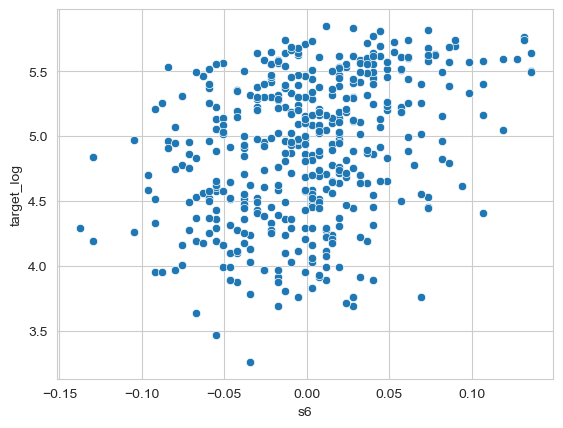

In [85]:
#print(cars_price_df.columns)
for num_var in ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6' ]:
    sns.scatterplot(data=diabetes_df,y='target_log',x=num_var)
    plt.show()

$Observations$


In [86]:
 diabetes_df[['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6' ,'target_log']].corr()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target_log
age,1.000000,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.192981
bmi,0.185085,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.545857
bp,0.335428,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.414540
s1,0.260061,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.229215
s2,0.219243,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.200050
s3,-0.075181,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.400671
s4,0.203841,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.433384
s5,0.270774,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.566958
s6,0.301731,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.353424
target_log,0.192981,0.545857,0.414540,0.229215,0.200050,-0.400671,0.433384,0.566958,0.353424,1.000000


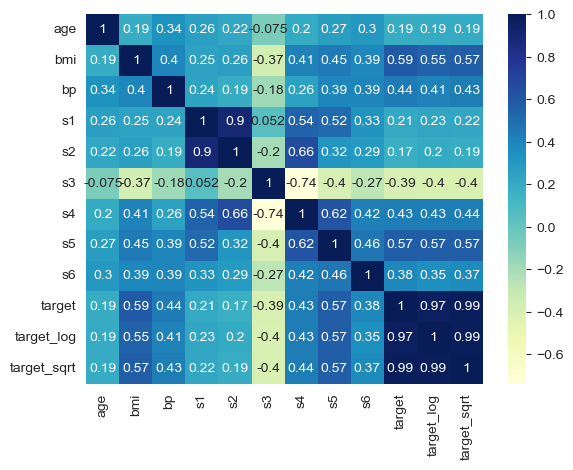

In [87]:
sns.heatmap(diabetes_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

# 10. Data Transformation

# 11. Standization - Normalization

# 12. Convert Cat - to - Numerical Columns

In [88]:
cat_onehot_df = pd.get_dummies(diabetes_df['sex'], prefix='Category',drop_first=False)

# Concatenate the dummy variables with the original DataFrame
diabetes_df = pd.concat([diabetes_df, cat_onehot_df], axis=1)
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,target_log,target_sqrt,Category_Female,Category_Male
0,0.038076,Male,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,5.023881,12.288206,False,True
1,-0.001882,Female,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,4.330733,8.660254,True,False
2,0.085299,Male,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,4.955827,11.874342,False,True
3,-0.089063,Female,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,5.332719,14.352700,True,False
4,0.005383,Female,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,4.912655,11.618950,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,Male,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0,5.187386,13.341664,False,True
438,-0.005515,Male,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0,4.653960,10.198039,False,True
439,0.041708,Male,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0,4.890349,11.489125,False,True
440,-0.045472,Female,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0,5.398163,14.832397,True,False


## VIF

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
# the independent variables set 
X = diabetes_df[['age', 'bmi', 'bp', 's1','s2','s3','s4', 's5', 's6']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

  feature        VIF
0     age   1.205380
1     bmi   1.478660
2      bp   1.407578
3      s1  59.062508
4      s2  39.123245
5      s3  15.369272
6      s4   8.833675
7      s5  10.075391
8      s6   1.476845


In [90]:
diabetes_df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target',
       'target_log', 'target_sqrt', 'Category_Female', 'Category_Male'],
      dtype='object')

In [91]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              442 non-null    float64
 1   sex              442 non-null    object 
 2   bmi              442 non-null    float64
 3   bp               442 non-null    float64
 4   s1               442 non-null    float64
 5   s2               442 non-null    float64
 6   s3               442 non-null    float64
 7   s4               442 non-null    float64
 8   s5               442 non-null    float64
 9   s6               442 non-null    float64
 10  target           442 non-null    float64
 11  target_log       442 non-null    float64
 12  target_sqrt      442 non-null    float64
 13  Category_Female  442 non-null    bool   
 14  Category_Male    442 non-null    bool   
dtypes: bool(2), float64(12), object(1)
memory usage: 45.9+ KB


# 13. Inferential statistics test

In [92]:
for i in ['Category_Female','Category_Male']:
    diabetes_df[i] = diabetes_df[i].astype(int)

In [93]:
import statsmodels.api as sm
X = sm.add_constant(diabetes_df[ ['age','Category_Female','Category_Male', 'bmi', 'bp', 's4']])

# Fit a linear regression model
model = sm.OLS(diabetes_df['target_log'], X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Calculate the R2 score
print(f"R2 score: {results.rsquared}")


                            OLS Regression Results                            
Dep. Variable:             target_log   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     58.95
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           8.11e-47
Time:                        15:59:58   Log-Likelihood:                -251.08
No. Observations:                 442   AIC:                             514.2
Df Residuals:                     436   BIC:                             538.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.2569      0.014    2

$Observations$
- Durbin-Watson (1.901) - Since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.

# 14. ML - Linear Regression Model

In [94]:
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,target_log,target_sqrt,Category_Female,Category_Male
0,0.038076,Male,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,5.023881,12.288206,0,1
1,-0.001882,Female,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,4.330733,8.660254,1,0
2,0.085299,Male,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,4.955827,11.874342,0,1
3,-0.089063,Female,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,5.332719,14.352700,1,0
4,0.005383,Female,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,4.912655,11.618950,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,Male,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0,5.187386,13.341664,0,1
438,-0.005515,Male,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0,4.653960,10.198039,0,1
439,0.041708,Male,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0,4.890349,11.489125,0,1
440,-0.045472,Female,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0,5.398163,14.832397,1,0


In [95]:
diabetes_df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target',
       'target_log', 'target_sqrt', 'Category_Female', 'Category_Male'],
      dtype='object')

In [96]:
X=diabetes_df.drop(['sex','target','target_log','target_sqrt','s1','s2','s3','s5'],axis='columns')
Y=diabetes_df['target_log']

In [97]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)
print("train data length:",len(X_train))
print("test data length:",len(X_test))
X.columns

train data length: 309
test data length: 133


Index(['age', 'bmi', 'bp', 's4', 's6', 'Category_Female', 'Category_Male'], dtype='object')

In [98]:
def adjusted_r_squared(y_true, y_pred, n_samples, n_features):
    """
    Calculate the adjusted R-squared score.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - n_samples: int, number of samples (observations)
    - n_features: int, number of features (predictors)

    Returns:
    - adjusted R-squared score
    """
    from sklearn.metrics import r2_score

    r_squared = r2_score(y_true, y_pred)
    adjusted_r_squared = 1 - (1 - r_squared) * ((n_samples - 1) / (n_samples - n_features - 1))
    
    return adjusted_r_squared


In [99]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
print("columns:",X_train.columns)
print('Coefficients: ', lr.coef_)
print('Intercept:',lr.intercept_)
print("train R2 Score:",lr.score(X_train,Y_train))
print("Test R2 Score:",lr.score(X_test,Y_test))
print("Test R2 score:",r2_score(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))
print("RMSE:",mean_squared_error(Y_test,Y_pred,squared=False))
print("Adj-R Score",adjusted_r_squared(Y_test,Y_pred,len(Y_test),10))

columns: Index(['age', 'bmi', 'bp', 's4', 's6', 'Category_Female', 'Category_Male'], dtype='object')
Coefficients:  [ 0.12546065  3.6258574   3.25578138  3.16222657  0.14883204  0.07854597
 -0.07854597]
Intercept: 4.873649243966725
train R2 Score: 0.408319046333421
Test R2 Score: 0.3783100989305471
Test R2 score: 0.3783100989305471
MSE: 0.17996650454986782
RMSE: 0.4242245921087883
Adj-R Score 0.3273519103182968


C:\Users\91956\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# 15. Erros - Normaly distributed

C:\Users\91956\AppData\Local\Temp\ipykernel_28908\81128678.py:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(np.array(delta_y), bw=0.5)


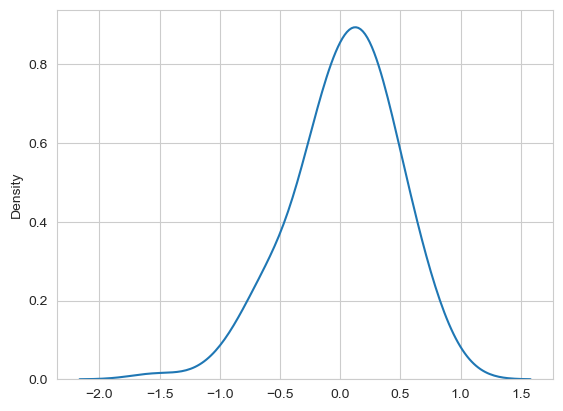

In [100]:
delta_y = Y_test - Y_pred;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

## Decision Tree Regression

In [101]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the model
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
print("Model - Decision Tree Regression")

# Predict on training set
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("train - MSE",train_mse)
print("train - RMSE",train_rmse)
# R2 score
r2 = r2_score(Y_train, y_train_pred)
print("train-R 2 Score",r2)

# Predict on test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test - MSE",test_mse)
print("test - RMSE",test_rmse)
# R2 score
r2 = r2_score(Y_test, y_test_pred)
print("test-R 2 Score",r2)

Model - Decision Tree Regression
train - MSE 0.0
train - RMSE 0.0
train-R 2 Score 1.0
test - MSE 0.29864778282345944
test - RMSE 0.5464867636306111
test-R 2 Score -0.031671482549024965


## Random Forest Regression

In [102]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit the model
model = RandomForestRegressor()
model.fit(X_train, Y_train)
print("Model - Random Forest Regression")

# Predict on training set
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("train - MSE",train_mse)
print("train - RMSE",train_rmse)
# R2 score
r2 = r2_score(Y_train, y_train_pred)
print("train-R 2 Score",r2)

# Predict on test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test - MSE",test_mse)
print("test - RMSE",test_rmse)

# R2 score
r2 = r2_score(Y_test, y_test_pred)
print("test-R 2 Score",r2)

Model - Random Forest Regression
train - MSE 0.02733557591987447
train - RMSE 0.16533473899902124
train-R 2 Score 0.9121840768354512
test - MSE 0.18450752383599264
test - RMSE 0.4295433899340003
test-R 2 Score 0.362623258549852


## Support Vector Regression (SVR)

In [103]:
from sklearn.svm import SVR

# Create and fit the model
model = SVR(kernel='linear')
model.fit(X_train, Y_train)
print("Model - Support Vector Regression ")

# Predict on training set
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("train - MSE",train_mse)
print("train - RMSE",train_rmse)
# R2 score
r2 = r2_score(Y_train, y_train_pred)
print("train-R 2 Score",r2)

# Predict on test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test - MSE",test_mse)
print("test - RMSE",test_rmse)

# R2 score
r2 = r2_score(Y_test, y_test_pred)
print("test-R 2 Score",r2)

Model - Support Vector Regression 
train - MSE 0.1935787648807208
train - RMSE 0.4399758685209006
train-R 2 Score 0.3781254877204101
test - MSE 0.1812709773606049
test - RMSE 0.4257592950959555
test-R 2 Score 0.37380382941843227


## AdaBoost Regression

In [104]:
from sklearn.ensemble import AdaBoostRegressor

# Create and fit the model
ada_boost = AdaBoostRegressor()
ada_boost.fit(X_train, Y_train)
print("Model - AdaBoost Regression ")
# Predict on training set
y_train_pred = ada_boost.predict(X_train)
train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("train - MSE",train_mse)
print("train - RMSE",train_rmse)
# R2 score
r2 = r2_score(Y_train, y_train_pred)
print("train-R 2 Score",r2)

# Predict on test set
y_test_pred = ada_boost.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test - MSE",test_mse)
print("test - RMSE",test_rmse)

# R2 score
# R2 score
r2 = r2_score(Y_test, y_test_pred)
print("test-R 2 Score",r2)

Model - AdaBoost Regression 
train - MSE 0.151988498314168
train - RMSE 0.3898570229124621
train-R 2 Score 0.5117348056256564
test - MSE 0.18770731388654385
test - RMSE 0.4332520212146088
test-R 2 Score 0.35156966185447924


## Gradient Boosting Regression

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and fit the model
gradient_boost = GradientBoostingRegressor()
gradient_boost.fit(X_train, Y_train)
print("Model - Gradient Boosting Regression")

# Predict on training set
y_train_pred = gradient_boost.predict(X_train)
train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("train - MSE",train_mse)
print("train - RMSE",train_rmse)
# R2 score
r2 = r2_score(Y_train, y_train_pred)
print("train-R 2 Score",r2)

# Predict on test set
y_test_pred = gradient_boost.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test - MSE",test_mse)
print("test - RMSE",test_rmse)

# R2 score
r2 = r2_score(Y_test, y_test_pred)
print("test-R 2 Score",r2)

Model - Gradient Boosting Regression
train - MSE 0.06961044664121083
train - RMSE 0.26383791736824114
train-R 2 Score 0.7763754584277818
test - MSE 0.16931007247041993
test - RMSE 0.41147305193708605
test-R 2 Score 0.4151224836673387


## XGBoost Regression

In [106]:
import xgboost as xgb

# Create and fit the model
xg_boost = xgb.XGBRegressor()
xg_boost.fit(X_train, Y_train)
print("Model-XGBoost Regression")

# Predict on training set
y_train_pred = xg_boost.predict(X_train)
train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("train - MSE",train_mse)
print("train - RMSE",train_rmse)
# R2 score
r2 = r2_score(Y_train, y_train_pred)
print("train-R 2 Score",r2)

# Predict on test set
y_test_pred = xg_boost.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test - MSE",test_mse)
print("test - RMSE",test_rmse)

# R2 score
r2 = r2_score(Y_test, y_test_pred)
print("test-R 2 Score",r2)

Model-XGBoost Regression
train - MSE 2.0512168232351396e-05
train - RMSE 0.004529036126191907
train-R 2 Score 0.9999341043702642
test - MSE 0.18117604111975757
test - RMSE 0.4256477899857552
test-R 2 Score 0.3741317843472004


$Observations$

1. We are facing low / less accuracy(R Square)(Adj R Square) issue
2. Train R2 Score: 0.4134262859673067 (41%)
3. Test R2 Score: 0.3773486525182088 (37%)
4. Adj-R Score 0.32631165682298 (32%)

Will fix the issue in the next version / Revision